In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%mkdir exclusion
%mkdir inclusion

In [ ]:
%pwd

'/content'

In [ ]:
import os
import shutil

for filename in os.listdir("/content/gdrive/MyDrive/Harvard/Capstone/Prostate/analysis"):
    if filename.endswith("_exclusion.json"): 
      shutil.copyfile("/content/gdrive/MyDrive/Harvard/Capstone/Prostate/analysis/" + filename, "/content/exclusion/" + filename)
      
        
    else:
      shutil.copyfile("/content/gdrive/MyDrive/Harvard/Capstone/Prostate/analysis/" + filename, "/content/inclusion/" + filename)
      

In [ ]:
exclusion_num = len(os.listdir("/content/exclusion"))
print("Number of exclusion files are: ", exclusion_num)

inclusion_num = len(os.listdir("/content/inclusion"))
print("Number of inclusion files are: ", inclusion_num)


Number of exclusion files are:  483
Number of inclusion files are:  483


In [ ]:
exclusion_trials = []
for filename in os.listdir("/content/gdrive/MyDrive/Harvard/Capstone/Prostate/analysis"):
  exclusion_trials.append(filename[0:11])
trials = set(exclusion_trials)

## Reading in the JSON files

In [ ]:
import json

## Finding the files with errors 

In [ ]:
# inclusion
error_files_inclusion = []
for filename in os.listdir("/content/inclusion"):
  f = open("/content/inclusion/"+filename,)
  data = json.load(f)
  if 'error' in data:
    #print(print(filename), data)
    error_files_inclusion.append(filename)
    f.close()
  else:
    f.close()
    continue

In [ ]:
len(error_files_inclusion)

152

In [ ]:
# exclusion criteria
error_files_exclusion = []
for filename in os.listdir("/content/exclusion"):
  f = open("/content/exclusion/"+filename,)
  data = json.load(f)
  if 'error' in data:
    #print(print(filename), data)
    error_files_exclusion.append(filename)
    f.close()
  else:
    f.close()
    continue

In [ ]:
len(error_files_exclusion)

128

In [ ]:
for i in range(0, len(error_files_exclusion)):
  error_files_exclusion[i] = error_files_exclusion[i][0:11]

for i in range(0, len(error_files_inclusion)):
  error_files_inclusion[i] = error_files_inclusion[i][0:11]

In [ ]:
# finding the error files from exclusion criteria and inclusion criteria
error_files = set(error_files_exclusion + error_files_inclusion)

In [ ]:
len(error_files) # there are 246 trials that came back with an error

246

In [ ]:
correct_trials = set(trials) - error_files

In [ ]:
correct_trials = list(correct_trials)
correct_trials

['NCT00043212',
 'NCT01287845',
 'NCT03630666',
 'NCT03428087',
 'NCT00632905',
 'NCT01078545',
 'NCT00695773',
 'NCT00949338',
 'NCT03431753',
 'NCT02036060',
 'NCT00003084',
 'NCT04654715',
 'NCT03549000',
 'NCT03302169',
 'NCT00796458',
 'NCT04493853',
 'NCT00945477',
 'NCT02260349',
 'NCT03141671',
 'NCT02025010',
 'NCT03851640',
 'NCT03730324',
 'NCT04962919',
 'NCT00579423',
 'NCT02668718',
 'NCT01162395',
 'NCT01972217',
 'NCT01353625',
 'NCT02138721',
 'NCT02235142',
 'NCT03896984',
 'NCT03159585',
 'NCT03365297',
 'NCT01529086',
 'NCT04443062',
 'NCT00706498',
 'NCT01883128',
 'NCT03222466',
 'NCT00003682',
 'NCT03386812',
 'NCT04268628',
 'NCT03827616',
 'NCT01753297',
 'NCT04595019',
 'NCT02086266',
 'NCT04052048',
 'NCT04066335',
 'NCT03383016',
 'NCT03368989',
 'NCT02972060',
 'NCT03480074',
 'NCT00584532',
 'NCT00482274',
 'NCT03317990',
 'NCT02470910',
 'NCT03434535',
 'NCT01839994',
 'NCT01707966',
 'NCT03426748',
 'NCT02969564',
 'NCT01198457',
 'NCT00428220',
 'NCT021

In [ ]:
len(correct_trials) # there are 237 trials that came back with a successful result

237

## Removing the json files that contain errors from the /content/exclusion folder and the /content/inclusion folder

In [ ]:
for filename in os.listdir("/content/exclusion"):
    if filename[0:11] not in correct_trials: 
      os.remove("/content/exclusion/" + filename)

In [ ]:
count = 0
for filename in os.listdir("/content/exclusion"):
  count = count + 1
count

237

In [ ]:
for filename in os.listdir("/content/inclusion"):
    if filename[0:11] not in correct_trials: 
      os.remove("/content/inclusion/" + filename)

In [ ]:
count = 0
for filename in os.listdir("/content/inclusion"):
  count = count + 1
count

237

# Creating two spreadsheet (one inclusion criteria and one exclusion criteria)

In [ ]:
%mkdir prostate

In [ ]:
import zipfile
with zipfile.ZipFile("/content/gdrive/MyDrive/Harvard/Capstone/TreeBuilding/data/neoplasm/Prostatic Neoplasms.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/prostate")

In [ ]:
for filename in os.listdir("/content/prostate"):
    if filename[0:11] not in correct_trials: 
      os.remove("/content/prostate/" + filename)

In [ ]:
inclusion = pd.DataFrame(columns=('trial', 'criteria'))
exclusion = pd.DataFrame(columns=('trial', 'criteria'))

In [ ]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

add_to_inclusion = []
add_to_exclusion = []
add_to_description = []
counter = 0
for filename in os.listdir("/content/prostate"):
  print("Currently on: ", filename)
  newname = filename[:-4]
  tree = ET.parse("/content/prostate/" + str(filename))

  study_id = tree.find(".//nct_id").text # use this
  if tree.find(".//official_title") == None:
    study_title = tree.find(".//brief_title").text
  else:
    study_title = tree.find(".//official_title").text # use this
  brief_summary = tree.find("./brief_summary/textblock")
  detailed_description = tree.find("./detailed_description/textblock")

  if detailed_description == None:
    study_summary = brief_summary.text.replace('\r',"").replace('\n',"")
  else:
    study_summary = brief_summary.text.replace('\r',"").replace('\n',"") + detailed_description.text.replace('\r',"").replace('\n',"")

  status = tree.find(".//overall_status").text

  if tree.find(".//start_date") == None:
    date = "N/A"
  else:
    date = tree.find(".//start_date").text


  ### inclusion criteria

  root = tree.findall("./eligibility")

  #string concatenate the variables: gender, minimum_age, maximum_age, healthy_volunteers
  if root == []: # when the eligibility criteria does not exist, look for the gender, minimum age, maximum age, and healthy volunteers and put them into the inclusion criteria
    gender = "gender: "

    if tree.find(".//gender") == None:
      gender = gender + "N/A"

    else:
      gender = gender + tree.find(".//gender").text.replace('\r',"").replace('\n',"")

    
    minimum_age = "minimum age: "
    if tree.find(".//minimum_age") == None:
      minimum_age = minimum_age + "N/A"
      

    else:
      minimum_age = minimum_age + tree.find(".//minimum_age").text.replace('\r',"").replace('\n',"")
      

    
    maximum_age = "maximum age: "

    if tree.find(".//maximum_age") == None:
      maximum_age = maximum_age + "N/A"
      
    else:
      maximum_age = maximum_age + tree.find(".//maximum_age").text.replace('\r',"").replace('\n',"")
    
    
    healthy_volunteers = "healthy volunteers: "

    if tree.find(".//healthy_volunteers")== None:
      healthy_volunteers = healthy_volunteers + "N/A"
    else:
      healthy_volunteers = healthy_volunteers + tree.find(".//healthy_volunteers").text.replace('\r',"").replace('\n',"")
      
    

    inclusion_criteria = gender + "," +  minimum_age +  "," + maximum_age +  "," + healthy_volunteers
    exclusion_criteria = "N/A"

  
  else:    
    eligibility_criteria = ""
    for eligibility in root:
      for textblock in eligibility.findall('.//textblock'):
        eligibility_criteria = eligibility_criteria + textblock.text.replace('\r',"").replace('\n',"")
           
        
    idx = eligibility_criteria.find('Exclusion Criteria')

    inclusion_criteria = eligibility_criteria[:idx]           
    
    gender = "gender: "        
    if tree.find(".//gender") == None:
      gender = gender + "N/A"

    else:
      gender = gender + tree.find(".//gender").text.replace('\r',"").replace('\n',"")

    
    minimum_age = "minimum age: "
    if tree.find(".//minimum_age") == None:
      minimum_age = minimum_age + "N/A"
      

    else:
      minimum_age = minimum_age + tree.find(".//minimum_age").text.replace('\r',"").replace('\n',"")
      

    
    maximum_age = "maximum age: "

    if tree.find(".//maximum_age") == None:
      maximum_age = maximum_age + "N/A"
      
    else:
      maximum_age = maximum_age + tree.find(".//maximum_age").text.replace('\r',"").replace('\n',"")
    
    
    healthy_volunteers = "healthy volunteers: "

    if tree.find(".//healthy_volunteers")== None:
      healthy_volunteers = healthy_volunteers + "N/A"
    else:
      healthy_volunteers = healthy_volunteers + tree.find(".//healthy_volunteers").text.replace('\r',"").replace('\n',"")

    inclusion_criteria =  gender + "," +  minimum_age +  "," + maximum_age +  "," + healthy_volunteers + "," + inclusion_criteria        
           
    if idx == -1:
      exclusion_criteria = "N/A"
    else:
      exclusion_criteria = eligibility_criteria[idx:].replace('\r',"").replace('\n',"")

  add_to_inclusion.append([study_id, study_title, inclusion_criteria])
  add_to_exclusion.append([study_id, study_title, exclusion_criteria])
  add_to_description.append([study_id, study_title, study_summary])
  counter = counter + 1

#creating the dataframes
inclusion_df = pd.DataFrame(add_to_inclusion, columns=['study_id', 'study_title', 'inclusion_criteria'])
exclusion_df = pd.DataFrame(add_to_exclusion, columns=['study_id', 'study_title', 'exclusion_criteria'])
description_df = pd.DataFrame(add_to_description, columns=['study_id', 'study_title', 'summary'])

print("the loop ran: ", counter, " times")


inclusion_df.to_csv("./gdrive/MyDrive/Harvard/Capstone/Prostate/spreadsheets/inclusion.csv")
exclusion_df.to_csv("./gdrive/MyDrive/Harvard/Capstone/Prostate/spreadsheets/exclusion.csv")
description_df.to_csv("./gdrive/MyDrive/Harvard/Capstone/Prostate/spreadsheets/description.csv")



Currently on:  NCT02159950.xml
Currently on:  NCT03361969.xml
Currently on:  NCT00525408.xml
Currently on:  NCT04268628.xml
Currently on:  NCT00041171.xml
Currently on:  NCT04066335.xml
Currently on:  NCT04882618.xml
Currently on:  NCT00428220.xml
Currently on:  NCT04493853.xml
Currently on:  NCT00502164.xml
Currently on:  NCT01733836.xml
Currently on:  NCT02972060.xml
Currently on:  NCT00764166.xml
Currently on:  NCT02315989.xml
Currently on:  NCT03827616.xml
Currently on:  NCT03497377.xml
Currently on:  NCT02050542.xml
Currently on:  NCT03987386.xml
Currently on:  NCT03730324.xml
Currently on:  NCT04182594.xml
Currently on:  NCT01883128.xml
Currently on:  NCT00973882.xml
Currently on:  NCT03154190.xml
Currently on:  NCT03159676.xml
Currently on:  NCT00667069.xml
Currently on:  NCT02232672.xml
Currently on:  NCT02207504.xml
Currently on:  NCT03317990.xml
Currently on:  NCT04774133.xml
Currently on:  NCT00055471.xml
Currently on:  NCT02102646.xml
Currently on:  NCT03452436.xml
Currentl

In [ ]:
exclusion_df.shape

(237, 3)

## Finding the most common semantic types of entities in the INCLUSION CRITERIA

In [ ]:
entities_inclusion = []
for filename in os.listdir("/content/inclusion"):
  f = open("/content/inclusion/"+filename,)
  data = json.load(f)
  for i in range(0, len(data['entityMentions'])):
    entities_inclusion.append(data['entityMentions'][i]['type'])
  f.close()

In [ ]:
from collections import Counter
#Counter(entities_inclusion)
Counter([str(x) for x in entities_inclusion]).most_common()

[('PROBLEM', 1451),
 ('PROCEDURE', 1395),
 ('LABORATORY_DATA', 1036),
 ('ANATOMICAL_STRUCTURE', 802),
 ('MEDICINE', 585),
 ('LAB_VALUE', 558),
 ('LAB_UNIT', 363),
 ('LAB_RESULT', 132),
 ('SEVERITY', 124),
 ('BODY_FUNCTION', 65),
 ('BM_VALUE', 57),
 ('BODY_MEASUREMENT', 50),
 ('BF_RESULT', 39),
 ('MEDICAL_DEVICE', 28),
 ('BM_UNIT', 23),
 ('MED_STRENGTH', 23),
 ('MED_DURATION', 22),
 ('PROCEDURE_RESULT', 19),
 ('MED_ROUTE', 18),
 ('MED_UNIT', 14),
 ('MED_STATUS', 12),
 ('MED_FREQUENCY', 11),
 ('MED_FORM', 5),
 ('MED_DOSE', 5),
 ('SUBSTANCE_ABUSE', 4),
 ('BM_RESULT', 3)]

Text(0, 0.5, 'frequency')

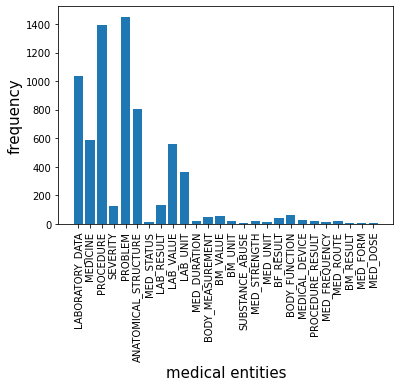

In [ ]:
import matplotlib.pyplot as plt
plt.bar(Counter(entities_inclusion).keys(), Counter(entities_inclusion).values())

plt.xticks(rotation = 90)
plt.xlabel('medical entities', fontsize=15)
plt.ylabel('frequency', fontsize=15)

## Finding the most common semantic types of entities in the EXCLUSION CRITERIA

In [ ]:
entities_exclusion = []
counter = 0
for filename in os.listdir("/content/exclusion"):
  f = open("/content/exclusion/"+filename,)
  data = json.load(f)
  #print(filename, data)
  if data == {}:
    counter = counter + 1
    continue
  else:
    for i in range(0, len(data['entityMentions'])):
      entities_exclusion.append(data['entityMentions'][i]['type'])
  f.close()

In [ ]:
print("There are", counter, "trials with empty exclusion criteria")

There are 44 trials with empty exclusion criteria


In [ ]:
ordered_entities_exclusion = Counter(entities_exclusion).most_common()

In [ ]:
len(set(entities_exclusion))


25

In [ ]:
len(set(entities_inclusion))

26

In [ ]:
Counter([str(x) for x in entities_exclusion]).most_common()

[('PROBLEM', 1899),
 ('PROCEDURE', 1020),
 ('MEDICINE', 691),
 ('ANATOMICAL_STRUCTURE', 502),
 ('SEVERITY', 238),
 ('LABORATORY_DATA', 200),
 ('BODY_MEASUREMENT', 86),
 ('LAB_VALUE', 82),
 ('BM_VALUE', 71),
 ('BM_UNIT', 62),
 ('MEDICAL_DEVICE', 53),
 ('LAB_UNIT', 43),
 ('LAB_RESULT', 36),
 ('BODY_FUNCTION', 22),
 ('MED_STRENGTH', 12),
 ('MED_DURATION', 12),
 ('SUBSTANCE_ABUSE', 11),
 ('MED_ROUTE', 10),
 ('BF_RESULT', 9),
 ('MED_UNIT', 8),
 ('MED_FREQUENCY', 8),
 ('PROCEDURE_RESULT', 7),
 ('MED_STATUS', 5),
 ('MED_DOSE', 4),
 ('BM_RESULT', 2)]

Text(0, 0.5, 'frequency')

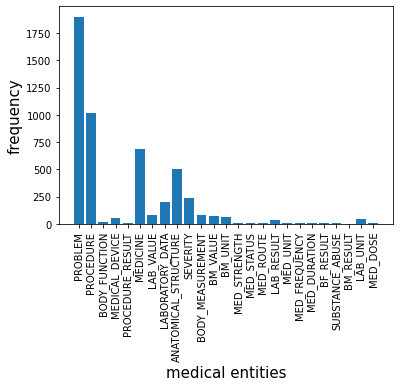

In [ ]:
import matplotlib.pyplot as plt
plt.bar(Counter(entities_exclusion).keys(), Counter(entities_exclusion).values())

plt.xticks(rotation = 90)
plt.xlabel('medical entities', fontsize=15)
plt.ylabel('frequency', fontsize=15)

# Finding the most common relationships in EXCLUSION CRITERIA

In [ ]:
relationships_exclusion= []
for filename in os.listdir("/content/exclusion"):
  f = open("/content/exclusion/"+filename,)
  data = json.load(f)
  if 'relationships' in data:
    for i in range(0, len(data['relationships'])):
      relationships_exclusion.append([
                            data['entityMentions'][int(data['relationships'][i]["subjectId"])-1]['type'],
                            data['entityMentions'][int(data['relationships'][i]["objectId"])-1]['type']
                            ])
    

In [ ]:
relationships_inclusion= []
for filename in os.listdir("/content/inclusion"):
  f = open("/content/inclusion/"+filename,)
  data = json.load(f)
  if 'relationships' in data:
    for i in range(0, len(data['relationships'])):
      relationships_inclusion.append([
                            data['entityMentions'][int(data['relationships'][i]["subjectId"])-1]['type'],
                            data['entityMentions'][int(data['relationships'][i]["objectId"])-1]['type']
                            ])

In [ ]:
from collections import Counter
Counter([str(x) for x in relationships_inclusion]).most_common()

[("['LABORATORY_DATA', 'LAB_VALUE']", 701),
 ("['PROBLEM', 'ANATOMICAL_STRUCTURE']", 616),
 ("['LABORATORY_DATA', 'LAB_UNIT']", 418),
 ("['PROBLEM', 'PROCEDURE']", 363),
 ("['LABORATORY_DATA', 'LAB_RESULT']", 184),
 ("['PROCEDURE', 'ANATOMICAL_STRUCTURE']", 167),
 ("['PROBLEM', 'SEVERITY']", 141),
 ("['PROBLEM', 'MEDICINE']", 47),
 ("['BODY_FUNCTION', 'BF_RESULT']", 42),
 ("['BODY_MEASUREMENT', 'BM_VALUE']", 39),
 ("['MEDICINE', 'MED_DURATION']", 36),
 ("['MEDICINE', 'MED_STRENGTH']", 24),
 ("['BODY_MEASUREMENT', 'BM_UNIT']", 24),
 ("['MEDICINE', 'MED_ROUTE']", 21),
 ("['PROCEDURE', 'PROCEDURE_RESULT']", 21),
 ("['MEDICINE', 'MED_STATUS']", 20),
 ("['MEDICINE', 'MED_UNIT']", 14),
 ("['MEDICINE', 'MED_FREQUENCY']", 13),
 ("['MEDICINE', 'MED_FORM']", 6),
 ("['MEDICINE', 'MED_DOSE']", 6),
 ("['BODY_MEASUREMENT', 'BM_RESULT']", 5),
 ("['ANATOMICAL_STRUCTURE', 'MEDICAL_DEVICE']", 2)]

In [ ]:
Counter([str(x) for x in relationships_exclusion]).most_common()

[("['PROBLEM', 'ANATOMICAL_STRUCTURE']", 455),
 ("['PROBLEM', 'PROCEDURE']", 302),
 ("['PROBLEM', 'SEVERITY']", 300),
 ("['PROBLEM', 'MEDICINE']", 117),
 ("['LABORATORY_DATA', 'LAB_VALUE']", 94),
 ("['PROCEDURE', 'ANATOMICAL_STRUCTURE']", 85),
 ("['BODY_MEASUREMENT', 'BM_VALUE']", 68),
 ("['BODY_MEASUREMENT', 'BM_UNIT']", 64),
 ("['LABORATORY_DATA', 'LAB_RESULT']", 53),
 ("['LABORATORY_DATA', 'LAB_UNIT']", 51),
 ("['MEDICINE', 'MED_DURATION']", 16),
 ("['MEDICINE', 'MED_STATUS']", 14),
 ("['MEDICINE', 'MED_STRENGTH']", 13),
 ("['MEDICINE', 'MED_FREQUENCY']", 12),
 ("['MEDICINE', 'MED_ROUTE']", 10),
 ("['MEDICINE', 'MED_UNIT']", 10),
 ("['BODY_FUNCTION', 'BF_RESULT']", 10),
 ("['PROCEDURE', 'PROCEDURE_RESULT']", 7),
 ("['MEDICINE', 'MED_DOSE']", 4),
 ("['ANATOMICAL_STRUCTURE', 'MEDICAL_DEVICE']", 4),
 ("['BODY_MEASUREMENT', 'BM_RESULT']", 3),
 ("['SUBSTANCE_ABUSE', 'SEVERITY']", 2)]